In [1]:
from google.colab import drive

# Menghubungkan ke Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Path ke file CSV di Google Drive Anda
file_path = "/content/drive/My Drive/Dataset/Automobile.csv"

# Membaca dataset ke dalam DataFrame
df = pd.read_csv(file_path)

# Sekarang Anda dapat melakukan operasi pada DataFrame 'df'
print (df.head())

                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  16.0          8         304.0       150.0   
4                ford torino  17.0          8         302.0       140.0   

   weight  acceleration  model_year origin  
0    3504          12.0          70    usa  
1    3693          11.5          70    usa  
2    3436          11.0          70    usa  
3    3433          12.0          70    usa  
4    3449          10.5          70    usa  


In [5]:
df #menampilkan isi csv menyeluruh

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [6]:
df.info() #menamiplkan info dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
df.describe() #menampilkan statistika dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

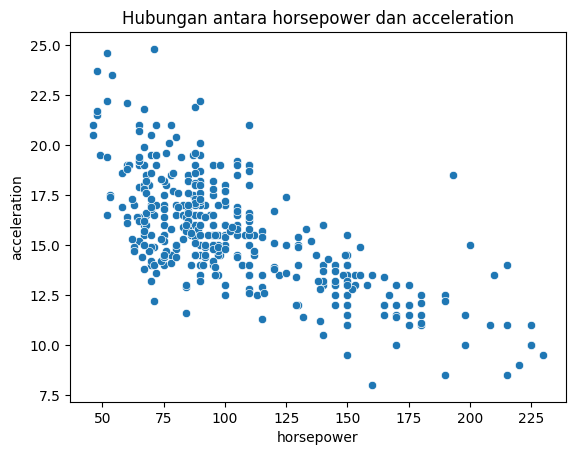

In [9]:
sns.scatterplot(data=df, x="horsepower", y="acceleration")

# Memberikan judul dan label sumbu
plt.title("Hubungan antara horsepower dan acceleration")
plt.xlabel("horsepower")
plt.ylabel("acceleration")

# Menampilkan plot
plt.show()

In [10]:
# Kolom label (variabel dependen)
x = df["horsepower"]

# Kolom target (variabel independen)
y = df["acceleration"]

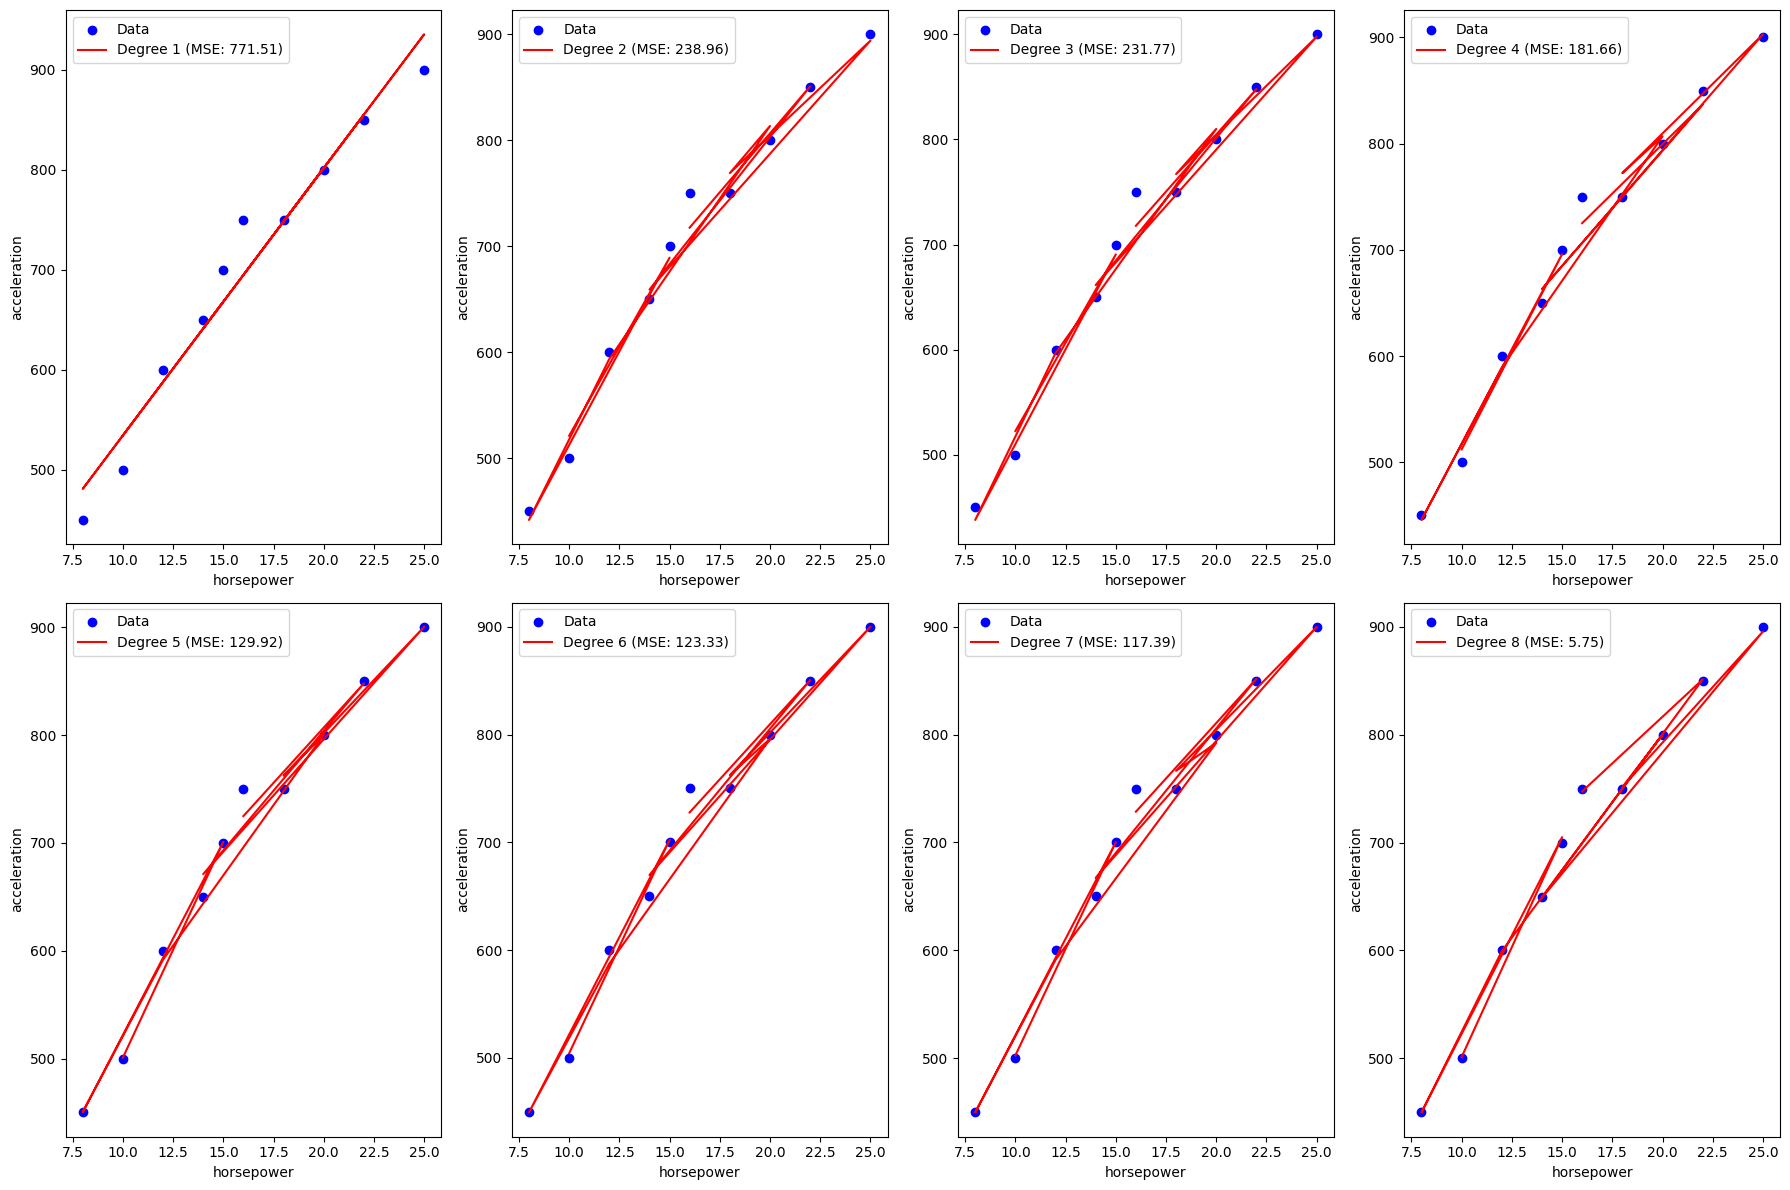

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Contoh data (gantilah dengan data sesuai kebutuhan Anda)
X = np.array([10, 15, 8, 12, 20, 18, 25, 14, 22, 16]).reshape(-1, 1)
y = np.array([500, 700, 450, 600, 800, 750, 900, 650, 850, 750])

# Menggunakan Polynomial Regression dengan derajat 1 hingga 8
degrees = np.arange(1, 9)

plt.figure(figsize=(18, 12))

for i, degree in enumerate(degrees):
    # Mengubah fitur menjadi polinomial dengan derajat sesuai iterasi
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Melatih model regresi linear dengan fitur polinomial
    model = LinearRegression()
    model.fit(X_poly, y)

    # Menghitung prediksi menggunakan data polinomial
    y_pred = model.predict(X_poly)

    # Menghitung Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_pred)

    # Membuat plot untuk setiap derajat polinomial
    plt.subplot(2, 4, i + 1)
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', label=f'Degree {degree} (MSE: {mse:.2f})')
    plt.xlabel('horsepower')
    plt.ylabel('acceleration')
    plt.legend()

plt.tight_layout()
plt.show()
